<a href="https://colab.research.google.com/github/sam2005-max/My_MobApp_Studio/blob/main/my_mobapp_studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#url_for_block_post
#https://medium.com/me/stories/drafts
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [ ]:
def load_dataset():
  return pd.read_csv("/content/sample_data/googleplaystore.csv")	
data = load_dataset()
data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
def print_summarize_dataset(data):
   print("Dataset dimension:")
   data.shape
   print("First 10 rows of dataset:")
   data.head(10)
   print("Statistical summary:")
   data.describe()
print_summarize_dataset(data)

Dataset dimension:
First 10 rows of dataset:
Statistical summary:


In [ ]:
def clean_dataset(data):
  data['Price'] = data['Price'].str.replace('Everyone', '0')
  data['Category'] = data['Category'].str.replace('_', ' ')
  data['Category'] = data['Category'].str.lower()
  data['App'] = data['App'].str.lower()
  data["Rating"] = data["Rating"].fillna(0)
  data['Price'] = data['Price'].str.replace('$', '')
  data['Size'] = data['Size'].str.replace('M', '')
  data['Size'] = data['Size'].str.replace('k', '000')
  data['Size'] = data['Size'].str.replace('+', '')
  data['Size'] = data['Size'].str.replace(',', '.')
  data['Size'] = data['Size'].str.replace('Varies with device', '0')
  data['Installs'] = data['Installs'].str.replace('+', '')
  data['Installs'] = data['Installs'].str.replace(',', '')
  data['Installs'] = data['Installs'].str.replace('Free', '0')
  data['Reviews'] = data['Reviews'].str.replace('M', '')
  data['Reviews'] = data['Reviews'].str.replace('.', '')
  data['Reviews'] = data['Reviews'].astype(int)
  data['Installs'] = data['Installs'].astype(int)
  data['Price'] = data['Price'].astype(float)
  data['Size'] = data['Size'].astype(float)
  data['Size'] = data['Size'].astype(int)
  data
clean_dataset(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  int64  
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.1+ MB


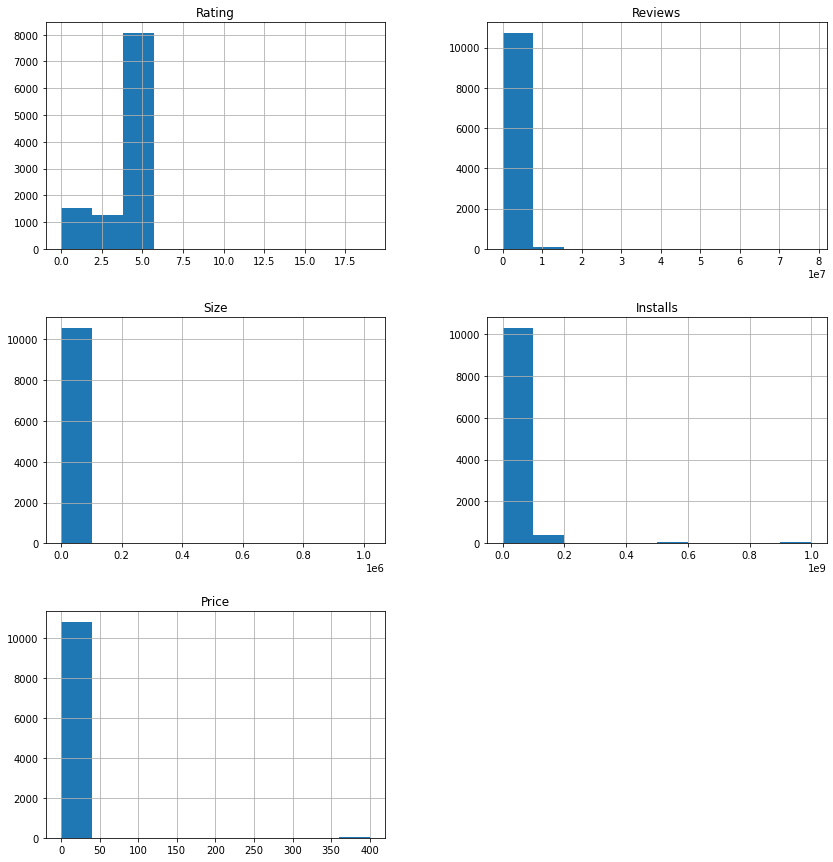

In [ ]:
def print_histograms(data):
  data.hist(bins=10,figsize=(14,15))
print_histograms(data)


In [ ]:
def compute_correlations_matrix(dataset):
  correlations = dataset.corr()
  res = correlations["Price"].abs().sort_values(ascending=False)
  print(res)
  x = np.median(res)
  print(f"median is {x} ")
compute_correlations_matrix(data)

Price       1.000000
Size        0.020971
Rating      0.016329
Installs    0.011688
Reviews     0.009666
Name: Price, dtype: float64
median is 0.016328994199811434 


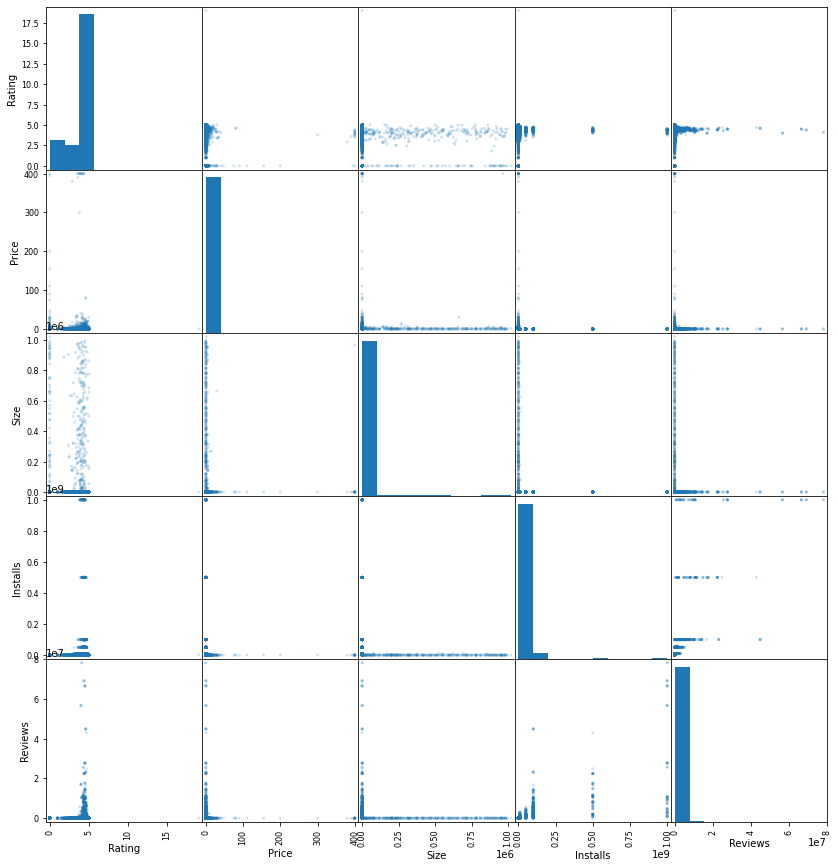

In [ ]:
def print_scatter_matrix(data):
  df = data[['Rating','Price','Size','Installs','Reviews']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(14,15))
print_scatter_matrix(data) 